# **AI Tasks - Search Algorithms**


### **Question 1: Comparing UCS with DFS**
A delivery drone needs to transport a package from a warehouse **(Node A)** to a customer's location **(Node F)**. The city has multiple possible routes, and each route has a different fuel cost based on distance, wind resistance, and obstacles.
Your task is to implement the **Uniform Cost Search (UCS) algorithm** and **DFS** to find the optimal path from a warehouse to a customer in a city graph.

### **Instructions:**
1. Implement **Uniform Cost Search (UCS)** to find the **least-cost path**.
2. Implement **Depth-First Search (DFS)**.
3. Compare both approaches and answer these questions below (in text form only):
   - **Which algorithm finds the shortest path?**
   - **Which one is more efficient in terms of cost and number of explored nodes?**
4. Use the following city graph:
   - Nodes: A (Warehouse), B, C, D, E, F (Customer)
   - Edges (with travel costs):
   - Initial Node: A
   - Goal Node: F

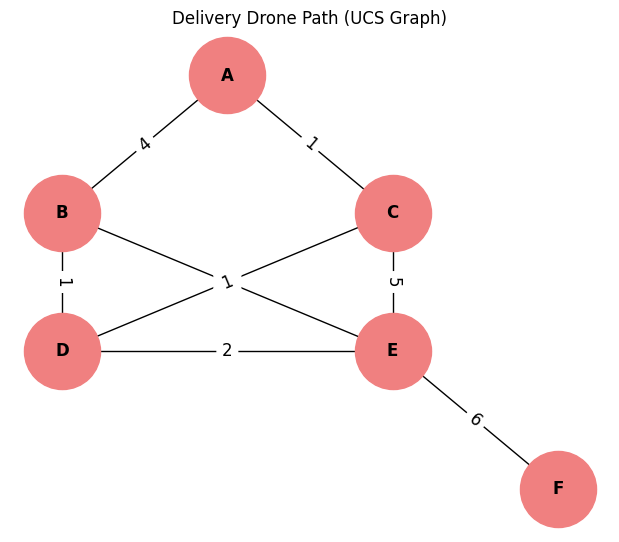


In [20]:
# Graph with paths (cost represents fuel usage)
city_graph = {
    'A': [('B', 4), ('C', 1)],
    'B': [('A', 4), ('D', 1), ('E', 1)],
    'C': [('A', 1), ('E', 5), ('D', 1)],
    'D': [('B', 1), ('C', 1), ('E', 2)],
    'E': [('B', 1), ('C', 5), ('D', 2), ('F', 6)],
    'F': [('E', 6)]
}

In [21]:
import heapq

def uniform_cost_search(graph, start, goal):
    ## TODO: Implement Uniform Cost Search (UCS) to find the least-cost path.

    # Initialize the priority queue (use heapq)
    priority_queue = [(0, start, [start])]  # Format: (cost, node, path)

    # Initialize an empty set to track visited nodes
    visited = set()

    while priority_queue:
        # Get the node with the lowest cost

        cost, node, path = heapq.heappop(priority_queue)

        # TODO: If the goal is reached, return the path and total cost

        if node in visited:
            continue
        visited.add(node)

        # TODO: Mark node as visited (to prevent cycles)
        if node == goal:
            return path,cost,

        # TODO: Expand neighbors and add them to the priority queue with updated cost
        
        for neighbor, edge_cost in graph.get(node, []):
            if neighbor not in visited:
                heapq.heappush(priority_queue, (cost + edge_cost, neighbor, path + [neighbor]))

    return None, float('inf')  # Return failure if no path is found



### **DFS Starting Code**

In [22]:
def dfs(graph, start, goal):
    """ Implements Depth-First Search (DFS) to find a path from start to goal. """
    stack = [(start, [start])]
    visited = set()

    while stack:
        node, path = stack.pop()

        if node in visited:
            continue
        visited.add(node)

        if node == goal:
            return path  # Return the path found

        for neighbor, _ in graph.get(node, []):
            if neighbor not in visited:
                stack.append((neighbor, path + [neighbor]))

    return None  # Return failure if no path is found


In [23]:
start_location = 'A'  # Warehouse
goal_location = 'F'   # Customer's location

# Run UCS (after implementation)
ucs_path, ucs_cost = uniform_cost_search(city_graph, start_location, goal_location)
print("UCS Optimal Path:", " → ".join(ucs_path) if ucs_path else "No Path Found")
print("UCS Total Cost:", ucs_cost)

# Run DFS (after implementation)
dfs_path = dfs(city_graph, start_location, goal_location)
print("\nDFS Path:", " → ".join(dfs_path) if dfs_path else "No Path Found")


UCS Optimal Path: A → C → D → B → E → F
UCS Total Cost: 10

DFS Path: A → C → D → E → F


DFS finds the shortest path.
UCS finds the least cost path.
while DFS passes thorugh the least nodes i.e it finds the shortest path. UCS finds the least cost path. Although in this particular case the cost of both methods is the same.

### **Question 2: GREEDY SEARCH ALGORITHM**
You are given a graph representation of **Romania's cities** and their road connections along with **heuristic values** representing the straight-line distance to Bucharest.
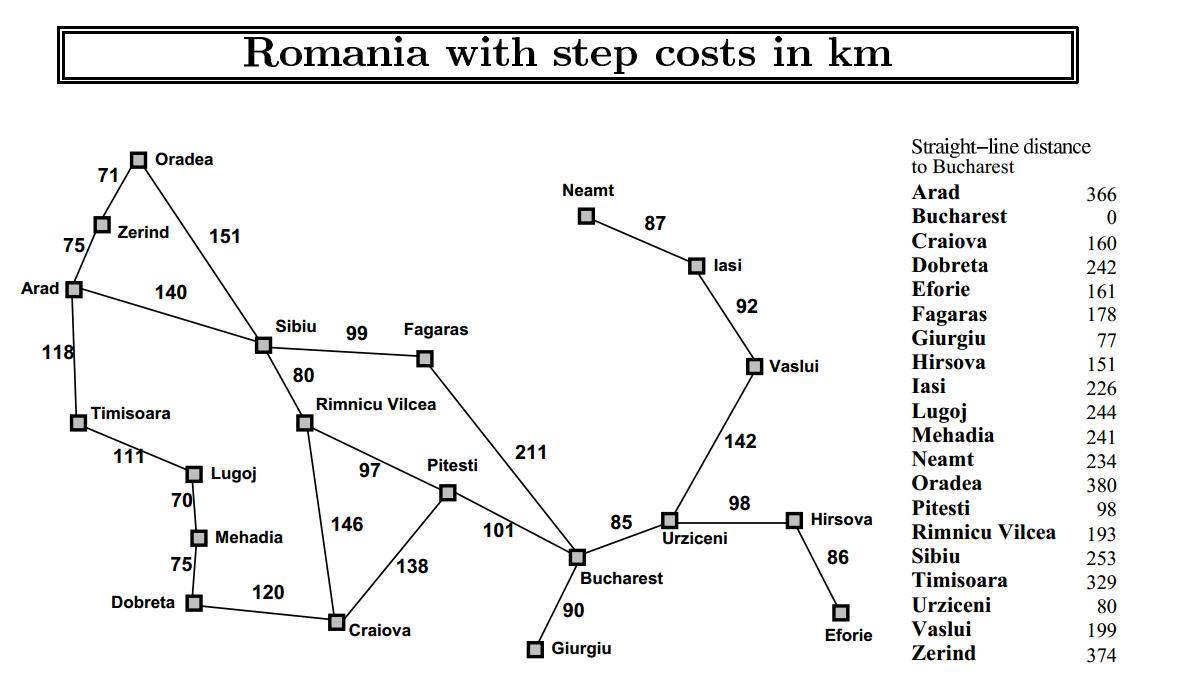
### **Your Task:**
Your task is to find the best route from **Arad (Start)** to **Bucharest (Goal)** using Greedy Best First Search Algorithm.


In [24]:
# Graph Representation (Adjacency List with Travel Costs)
city_graph = {
    'Arad': [('Sibiu', 140), ('Timisoara', 118), ('Zerind', 75)],
    'Bucharest': [('Fagaras', 211), ('Giurgiu', 90), ('Pitesti', 101), ('Urziceni', 85)],
    'Craiova': [('Dobreta', 120), ('Pitesti', 138), ('Rimnicu_Vilcea', 146)],
    'Dobreta': [('Mehadia', 75), ('Craiova', 120)],
    'Eforie': [('Hirsova', 86)],
    'Fagaras': [('Sibiu', 99), ('Bucharest', 211)],
    'Hirsova': [('Urziceni', 98), ('Eforie', 86)],
    'Iasi': [('Neamt', 87), ('Vaslui', 92)],
    'Lugoj': [('Mehadia', 70), ('Timisoara', 111)],
    'Mehadia': [('Dobreta', 75), ('Lugoj', 70)],
    'Neamt': [('Iasi', 87)],
    'Oradea': [('Zerind', 71), ('Sibiu', 151)],
    'Pitesti': [('Rimnicu_Vilcea', 97), ('Bucharest', 101)],
    'Rimnicu_Vilcea': [('Sibiu', 80), ('Craiova', 146), ('Pitesti', 97)],
    'Sibiu': [('Arad', 140), ('Oradea', 151), ('Fagaras', 99), ('Rimnicu_Vilcea', 80)],
    'Timisoara': [('Arad', 118), ('Lugoj', 111)],
    'Urziceni': [('Bucharest', 85), ('Hirsova', 98), ('Vaslui', 142)],
    'Vaslui': [('Iasi', 92), ('Urziceni', 142)],
    'Zerind': [('Arad', 75), ('Oradea', 71)]
}

# Heuristic Values (Straight-Line Distance to Bucharest)
heuristic = {
    'Arad': 366, 'Bucharest': 0, 'Craiova': 160, 'Dobreta': 242, 'Eforie': 161,
    'Fagaras': 178, 'Giurgiu': 77, 'Hirsova': 151, 'Iasi': 226, 'Lugoj': 244,
    'Mehadia': 241, 'Neamt': 234, 'Oradea': 380, 'Pitesti': 98, 'Rimnicu_Vilcea': 193,
    'Sibiu': 253, 'Timisoara': 329, 'Urziceni': 80, 'Vaslui': 199, 'Zerind': 374
}

# Start and Goal Cities
start_city = "Arad"
goal_city = "Bucharest"

In [25]:
# Greedy Best-First Search
def greedy_best_first_search(graph, heuristic, start, goal):
    priority_queue = [(heuristic[start], start, [start])]  # (heuristic value, city, path)
    visited = set()

    while priority_queue:
        _, current_city, path = heapq.heappop(priority_queue)

        if current_city == goal:
            return path  # Return the path when the goal is reached

        if current_city in visited:
            continue  # Skip if already visited

        visited.add(current_city)

        for neighbor, _ in graph[current_city]:  # Ignore edge costs in GBFS
            if neighbor not in visited:
                heapq.heappush(priority_queue, (heuristic[neighbor], neighbor, path + [neighbor]))

    return None  # No path found


In [26]:
gbfs_path = greedy_best_first_search(city_graph, heuristic, start_city, goal_city)
if gbfs_path:
    print("GBFS Path:", " → ".join(gbfs_path))
else:
    print("GBFS Path: No Path Found")


GBFS Path: Arad → Sibiu → Fagaras → Bucharest
